## Projeto 4 Telecom

In [1]:
#para aumentar a largura da celula do jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
!pip install scikit-learn
#conda install -c glemaitre imbalanced-learn

In [55]:
# Importando os módulos
import pandas as pd 
import matplotlib.pyplot as plt    
import numpy as np  
import seaborn as sea
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model  import  LinearRegression
from sklearn.metrics import classification_report,precision_score,accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [3]:
# Carregando o dataset com pandar
df = pd.read_csv("F:\CursosDSA\DSA\FCD\BigDataRealTimeAnalytucsPythonSpark\Cap12\Projeto4\projeto4_telecom_treino.csv")   

In [4]:
# Verificando o formato dos dados
df.shape

(3333, 21)

In [5]:
print(df.describe())

       Unnamed: 0  account_length  number_vmail_messages  total_day_minutes  \
count  3333.00000     3333.000000            3333.000000        3333.000000   
mean   1667.00000      101.064806               8.099010         179.775098   
std     962.29855       39.822106              13.688365          54.467389   
min       1.00000        1.000000               0.000000           0.000000   
25%     834.00000       74.000000               0.000000         143.700000   
50%    1667.00000      101.000000               0.000000         179.400000   
75%    2500.00000      127.000000              20.000000         216.400000   
max    3333.00000      243.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435        

In [6]:
# Verificando as primeiras linhas do dataset
df.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [7]:
# Verificando as últimas linhas do dataset
df.tail(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3328,3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no
3332,3333,TN,74,area_code_415,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,no


In [8]:
#nomeando colunas
df = df.rename(columns={'Unnamed: 0': 'ID', 'state': 'estado','account_length': 'tempo_conta', 
                        'area_code': 'area_code','international_plan': 'international_plan', 'voice_mail_plan': 'plano_voz',
                        'number_vmail_messages': 'num_mensagens','total_day_minutes': 'total_min_dia', 'total_day_calls': 'total_liga_dia', 
                        'total_day_charge': 'total_carga_dia','total_eve_minutes': 'total_eve_minutes', 'total_eve_minutes': 'total_eve_minutes',
                        'total_eve_charge': 'total_eve_charge', 'total_night_minutes': 'total_min_noite','total_night_calls': 'total_liga_noite', 
                        'total_night_charge': 'total_carga_noite','total_intl_minutes': 'total_intl_minutes', 'total_intl_calls': 'total_intl_calls',
                        'total_intl_charge':'total_intl_charge','number_customer_service_calls': 'num_liga_aten_cli','churn': 'churn'})


In [9]:
# Verificando as primeiras linhas do dataset
df.head(5)

,ID,estado,tempo_conta,area_code,international_plan,plano_voz,num_mensagens,total_min_dia,total_liga_dia,total_carga_dia,...,total_eve_calls,total_eve_charge,total_min_noite,total_liga_noite,total_carga_noite,total_intl_minutes,total_intl_calls,total_intl_charge,num_liga_aten_cli,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [10]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [11]:
#verificando qual coluna possui valores 0
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing tempo_conta: {0}".format(len(df.loc[df['tempo_conta'] == 0])))
print("# Linhas missing num_mensagens: {0}".format(len(df.loc[df['num_mensagens'] == 0])))
print("# Linhas missing total_min_dia: {0}".format(len(df.loc[df['total_min_dia'] == 0])))
print("# Linhas missing total_liga_dia: {0}".format(len(df.loc[df['total_liga_dia'] == 0])))
print("# Linhas missing total_carga_dia: {0}".format(len(df.loc[df['total_carga_dia'] == 0])))
print("# Linhas missing total_eve_calls: {0}".format(len(df.loc[df['total_eve_calls'] == 0])))

print("# Linhas missing total_eve_charge: {0}".format(len(df.loc[df['total_eve_charge'] == 0])))
print("# Linhas missing total_min_noite: {0}".format(len(df.loc[df['total_min_noite'] == 0])))
print("# Linhas missing total_liga_noite: {0}".format(len(df.loc[df['total_liga_noite'] == 0])))
print("# Linhas missing total_carga_noite: {0}".format(len(df.loc[df['total_carga_noite'] == 0])))
print("# Linhas missing total_intl_minutes: {0}".format(len(df.loc[df['total_intl_minutes'] == 0])))
print("# Linhas missing total_intl_calls: {0}".format(len(df.loc[df['total_intl_calls'] == 0])))
print("# Linhas missing total_intl_charge: {0}".format(len(df.loc[df['total_intl_charge'] == 0])))

# Linhas no dataframe 3333
# Linhas missing tempo_conta: 0
# Linhas missing num_mensagens: 2411
# Linhas missing total_min_dia: 2
# Linhas missing total_liga_dia: 2
# Linhas missing total_carga_dia: 2
# Linhas missing total_eve_calls: 1
# Linhas missing total_eve_charge: 1
# Linhas missing total_min_noite: 0
# Linhas missing total_liga_noite: 0
# Linhas missing total_carga_noite: 0
# Linhas missing total_intl_minutes: 18
# Linhas missing total_intl_calls: 18
# Linhas missing total_intl_charge: 18


In [12]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
#precisamos aber quais varivaveis sao relevantes para o nosso modelo 
#o grafico abaixo mostra as variveis com mais relaçao com a outra..
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

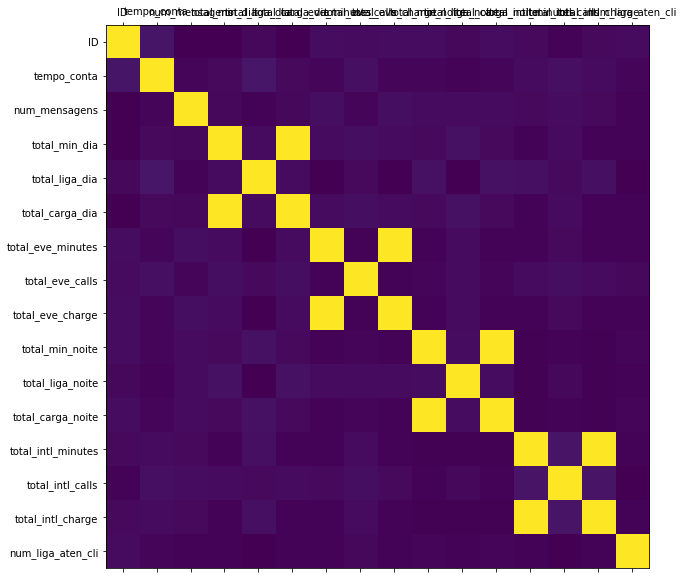

In [13]:
# Criando o gráfico
plot_corr(df)

In [14]:
df.corr()

,ID,tempo_conta,num_mensagens,total_min_dia,total_liga_dia,total_carga_dia,total_eve_minutes,total_eve_calls,total_eve_charge,total_min_noite,total_liga_noite,total_carga_noite,total_intl_minutes,total_intl_calls,total_intl_charge,num_liga_aten_cli
ID,1.000000,0.036667,-0.018086,-0.020769,0.000272,-0.020769,0.013872,0.009149,0.013875,0.011295,0.000995,0.011311,0.005822,-0.011221,0.005780,0.009665
tempo_conta,0.036667,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
num_mensagens,-0.018086,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total_min_dia,-0.020769,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total_liga_dia,0.000272,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total_carga_dia,-0.020769,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total_eve_minutes,0.013872,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total_eve_calls,0.009149,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total_eve_charge,0.013875,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total_min_noite,0.011295,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


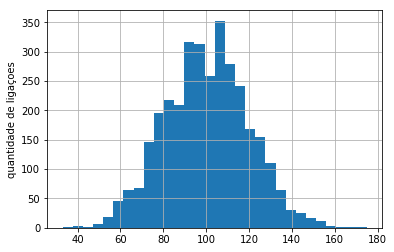

In [20]:
#df é o dataframe
#60 colunas/caixinhas
df.total_liga_noite.hist(bins = 30)
plt.ylabel("quantidade de ligaçoes")
plt.show()

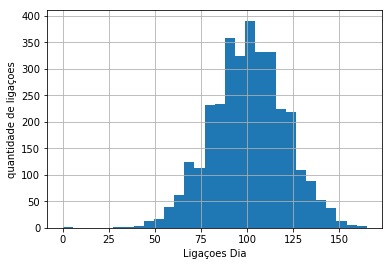

In [17]:
#df é o dataframe
#60 colunas/caixinhas
df.total_liga_dia.hist(bins = 30)
plt.xlabel("Ligaçoes Dia")
plt.ylabel("quantidade de ligaçoes")
plt.show()

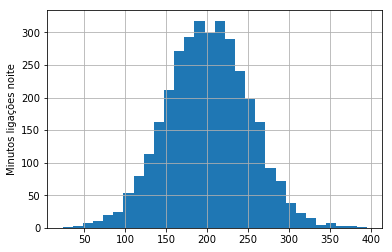

In [25]:
#df é o dataframe
#60 colunas/caixinhas
df.total_min_noite.hist(bins = 30)
plt.ylabel("Minutos ligações noite")
plt.show()

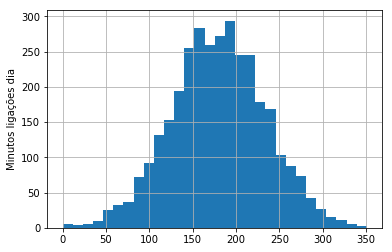

In [26]:
#df é o dataframe
#60 colunas/caixinhas
df.total_min_dia.hist(bins = 30)
plt.ylabel("Minutos ligações dia")
plt.show()

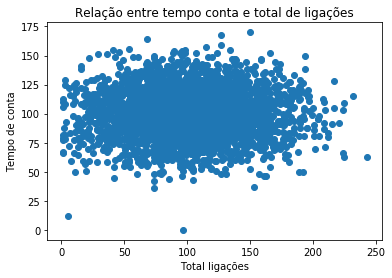

In [27]:
plt.scatter(df.tempo_conta, df.total_eve_calls)
plt.xlabel("Total ligações")
plt.ylabel("Tempo de conta")
plt.title("Relação entre tempo conta e total de ligações")
plt.show()

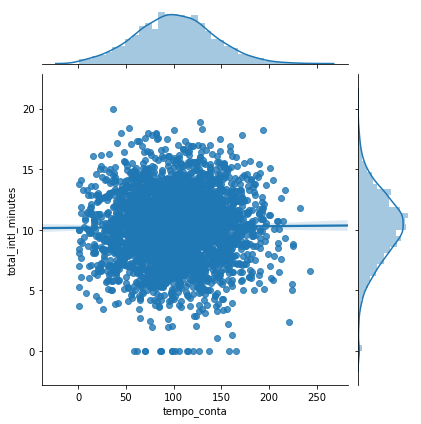

In [28]:
# O método joinplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot("tempo_conta", "total_intl_minutes", df, kind = 'reg');

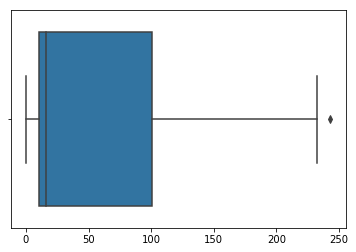

In [29]:
# Box Plot
sea.boxplot([df.tempo_conta, df.total_intl_minutes]);

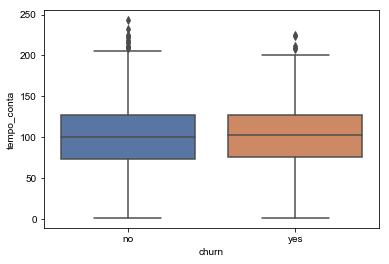

In [30]:
#tempo de conta x cancelar sim ou nao
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
sns.set(style="whitegrid")
ax = sns.boxplot(x="churn", 
                 y="tempo_conta", 
                # hue="sexo", 
                 data=df, 
                 linewidth=1.5)

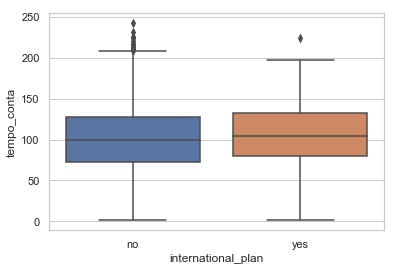

In [31]:
#tempo de conta x plano internacional
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
sns.set(style="whitegrid")
ax = sns.boxplot(x="international_plan", 
                 y="tempo_conta", 
                # hue="sexo", 
                 data=df, 
                 linewidth=1.5)

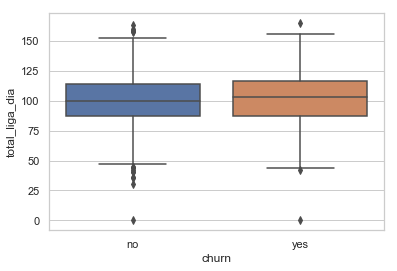

In [32]:
#cancelar sim ou nao x total de ligação
fig, ax = plt.subplots()
#fig.set_size_inches(12,8)
sns.set(style="whitegrid")
ax = sns.boxplot(x="churn", 
                 y="total_liga_dia", 
                # hue="sexo", 
                 data=df, 
                 linewidth=1.5)

In [35]:
df2=df
df2.head()

,ID,estado,tempo_conta,area_code,international_plan,plano_voz,num_mensagens,total_min_dia,total_liga_dia,total_carga_dia,...,total_eve_calls,total_eve_charge,total_min_noite,total_liga_noite,total_carga_noite,total_intl_minutes,total_intl_calls,total_intl_charge,num_liga_aten_cli,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [36]:
#alterando os valores string plano de voz, internacional e variavel target
def transforma_plano(valor):
    if valor =='yes':
        return 1
    else:
        return  0
    
    
df2['international_plan_n'] = df['international_plan'].map(transforma_plano)

def voz(valor):
    if valor == 'yes':
        return 1
    else:
        return  0
    
    
df2['plano_voz_n'] = df['plano_voz'].map(voz)

def area(valor):
    if valor == 'yes':
        return 1
    else:
        return  0
    
    
df2['churn_n'] = df['churn'].map(voz)

def area(valor):
    if valor == 'yes':
        return 1
    else:
        return  0
        
df2.head()

,ID,estado,tempo_conta,area_code,international_plan,plano_voz,num_mensagens,total_min_dia,total_liga_dia,total_carga_dia,...,total_liga_noite,total_carga_noite,total_intl_minutes,total_intl_calls,total_intl_charge,num_liga_aten_cli,churn,international_plan_n,plano_voz_n,churn_n
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,no,0,1,0
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,no,0,1,0
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,no,0,0,0
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,no,1,0,0
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,no,1,0,0


In [37]:
#removendo o texto da varivavel area_code
df3 = df2['area_code'].replace('area_code_','').astype("str")

In [38]:
#para cada elemento da coluna, ele vai pegar esse lelemento e realziar a mudança
df2['area_code'] = df2['area_code'].apply(lambda x:str(x).replace("area_code_",""))

In [39]:
df2['area_code'] = df2['area_code'].astype('str')

In [40]:
# Verificando as primeiras linhas do dataset
df2.head(5)

,ID,estado,tempo_conta,area_code,international_plan,plano_voz,num_mensagens,total_min_dia,total_liga_dia,total_carga_dia,...,total_liga_noite,total_carga_noite,total_intl_minutes,total_intl_calls,total_intl_charge,num_liga_aten_cli,churn,international_plan_n,plano_voz_n,churn_n
0,1,KS,128,415,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,no,0,1,0
1,2,OH,107,415,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,no,0,1,0
2,3,NJ,137,415,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,no,0,0,0
3,4,OH,84,408,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,no,1,0,0
4,5,OK,75,415,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,no,1,0,0


In [41]:
#funcao de calculo de frequencias
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res

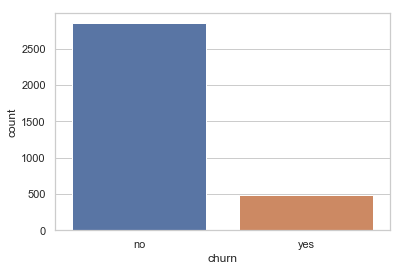

,values,n,perc
no,no,2850,85.509
yes,yes,483,14.491


In [42]:
#frequencia da variavel churn
freq(df2.churn, plot=True)

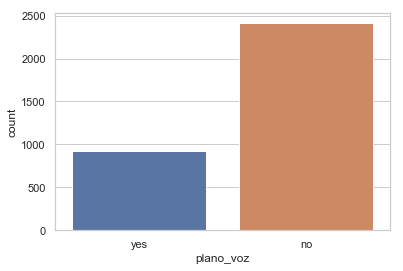

,values,n,perc
no,yes,2411,72.337
yes,no,922,27.663


In [43]:
#frequencia dos planos de voz
freq(df2.plano_voz, plot=True)

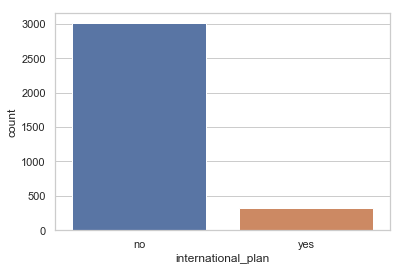

,values,n,perc
no,no,3010,90.309
yes,yes,323,9.691


In [44]:
#frequencia dos planos internacionais
freq(df2.international_plan, plot=True)


## Construindo o modelo

In [45]:
#Atribuindo a coluna TARGET a y e as colunas restantes a x.
x = df2.drop(columns=['ID','plano_voz','churn_n','churn','international_plan','estado'])
y = df2['churn_n']

In [46]:
#Dividir o conjunto de dados de treinamento em teste e treinamento
x_treino, x_teste, y_treino, y_teste = train_test_split(x , y , test_size = 0.3 , random_state = 20)
x_treino, x_teste, y_treino, y_teste = train_test_split(x , y , test_size = 0.3 , random_state = 20)

## Modelo de Regressao logistica

In [47]:
modelo = LogisticRegression()

In [48]:
modelo.fit(x_treino,y_treino)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [49]:
predi = modelo.predict(x_teste)

In [51]:
#confusion matrix
cm = confusion_matrix(y_teste, predi)

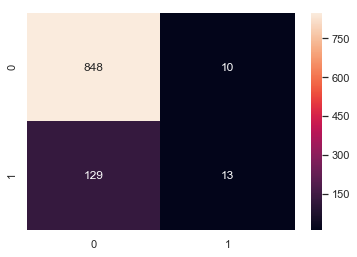

In [52]:
sns.heatmap(cm,annot=True, fmt = "d")

In [53]:
#Observe o Recall
print(classification_report(y_teste, predi))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       858
           1       0.57      0.09      0.16       142

    accuracy                           0.86      1000
   macro avg       0.72      0.54      0.54      1000
weighted avg       0.82      0.86      0.82      1000



# metricas

In [54]:
#acurácia
acc = accuracy_score(y_teste,predi)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 86.10%


# Balanceando os dados

Uma técnica amplamente adotada para lidar com conjuntos de dados altamente desequilibrados é chamada de resamplagem. 
Consiste em remover amostras da classe majoritária (subamoscação) e /ou adicionar mais exemplos da classe minoritária 
(super amostragem).

Eliminação de casos escolhidos aleatoriamente da classe majoritária para diminuir seu efeito sobre o classificador. Todos os casos da classe minoritária são mantidos.

# SMOTE - Balanceamento 

In [56]:
#Quantidade de dados por classe
np.bincount(y)

array([2850,  483], dtype=int64)

In [57]:
smt = SMOTE()

In [58]:
x,y = smt.fit_sample(x,y)

In [59]:
#Quantidade de dados por classe
np.bincount(y)

array([2850, 2850], dtype=int64)

In [60]:
#Dividir o conjunto de dados em teste e treinamento
x_treino, x_teste, y_treino, y_teste = train_test_split(x , y , test_size = 0.3 , random_state = 20)

In [61]:
modelo = LogisticRegression()

In [62]:
modelo.fit(x_treino,y_treino)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [63]:
predi = modelo.predict(x_teste)

In [64]:
#confusion matrix
cm = confusion_matrix(y_teste, predi)

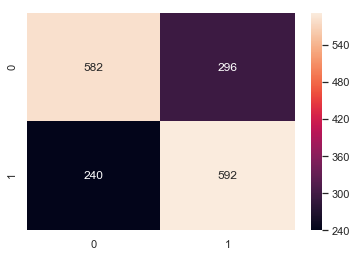

In [65]:
sns.heatmap(cm,annot=True, fmt = "d")

In [66]:
#Observe o Recall
print(classification_report(y_teste, predi))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       878
           1       0.67      0.71      0.69       832

    accuracy                           0.69      1710
   macro avg       0.69      0.69      0.69      1710
weighted avg       0.69      0.69      0.69      1710



In [67]:
acc = accuracy_score(y_teste,predi)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 68.65%


# Aplicando o NearMiss

Objetivo é igualar a quantidade de amostras entre as classes

In [70]:
nr = NearMiss( n_neighbors = 13)

In [71]:
x,y = nr.fit_sample(x,y)

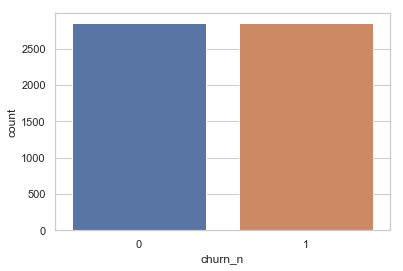

In [72]:
ax = sns.countplot(x=y)

In [73]:
#Splitting the  training dataset into test and train
x_treino, x_teste, y_treino, y_teste = train_test_split(x , y , test_size = 0.3 , random_state = 20)

In [74]:
modelo = LogisticRegression()

In [75]:
modelo.fit(x_treino,y_treino)

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [76]:
predi = modelo.predict(x_teste)

In [77]:
cm = confusion_matrix(y_teste, predi)

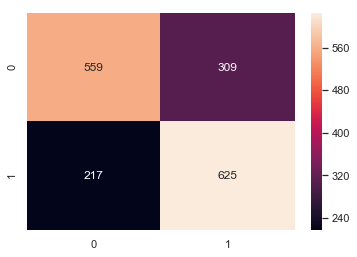

In [78]:
sns.heatmap(cm,annot=True, fmt = "d")

In [79]:
#Observe o Recall
print(classification_report(y_teste, predi))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       868
           1       0.67      0.74      0.70       842

    accuracy                           0.69      1710
   macro avg       0.69      0.69      0.69      1710
weighted avg       0.70      0.69      0.69      1710



In [80]:
acc = accuracy_score(y_teste,predi)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 69.24%
